# Quantile Transform - Walkthrough

In this notebook, I will be walking through how we can use the Quantile Transform to map our data from X to a marginally Gaussian distributed. I will be modifying the original algorithm with a few extra features that will allow us to handle the boundary issues that can arise.

In [1]:
import os, sys
cwd = os.getcwd()
sys.path.insert(0, f"{cwd}/../")

# Import RBIG Function
import numpy as np
from rbig.data import ToyData
from rbig.quantile import QuantileGaussian
from scipy import stats

# Plot Functions
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

In [17]:
def plot_2d_joint(data, color='red'):
    
    fig  = plt.figure(figsize=(5, 5))

    g = sns.jointplot(x=data[:, 0], y=data[:, 1], kind='hex', color=color)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data')
    plt.tight_layout()
    plt.show()
    
def plot_prob(data, probs):
    
    fig, ax = plt.subplots()

    h = ax.scatter(data[:, 0], data[:, 1], s=1, c=probs)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    cbar = plt.colorbar(h, )
    plt.show()

<Figure size 360x360 with 0 Axes>

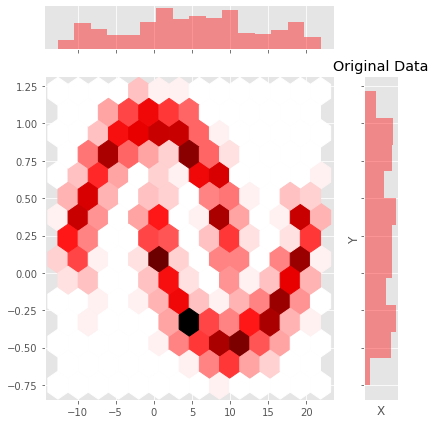

In [18]:
seed = 123
rng = np.random.RandomState(seed=seed)
dataset = 'moons'
n_samples = 1_000
noise = 0.1
random_state=123


data = ToyData(dataset, n_samples, noise, random_state).generate_samples()
X = 10* data[:, 0]
Y = data[:, 1]
data[:, 0] = 10 * data[:, 0]

plot_2d_joint(data)

## 1. Get Percentiles

In [26]:
n_quantiles = 500       # precision of our hist dist
subsample   = 500  # we can subsample dist if it's a lot of points
bin_est     = None
support_ext = 1.
interp      = 'slinear'

transformer = QuantileGaussian(
    n_quantiles=n_quantiles, 
    subsample=subsample, 
    bin_est=bin_est,
    random_state=random_state,
    support_ext=support_ext,
    interp=interp,
)

transformer.fit(data);

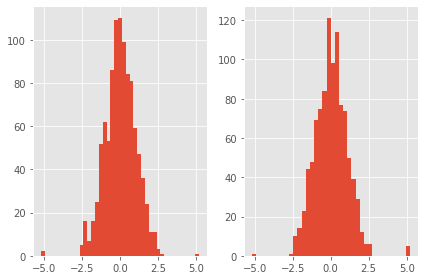

In [27]:
data_G = transformer.transform(data)

fig, ax = plt.subplots(ncols=2)

ax[0].hist(data_G[:, 0], bins='auto')
ax[1].hist(data_G[:, 1], bins='auto')
plt.tight_layout()
plt.show()

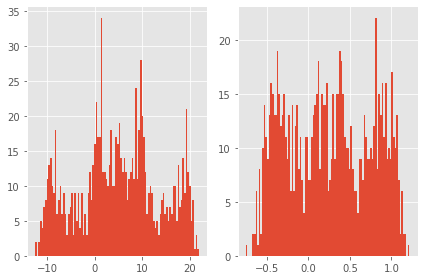

In [28]:
fig, ax = plt.subplots(ncols=2)

ax[0].hist(data[:, 0], bins=100)
ax[1].hist(data[:, 1], bins=100)
plt.tight_layout()
plt.show()

### LogLikelihood Samples

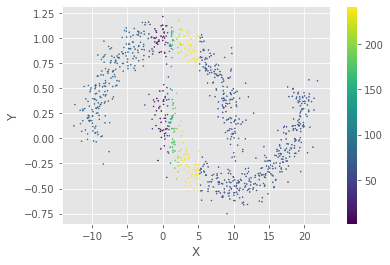

In [29]:
nll = transformer.score_samples(data)
plot_prob(data, nll)

### Mean LogLikelihood

In [30]:
mll = transformer.score(data)
print(mll)

90.5775821824479


### Sampling

<Figure size 360x360 with 0 Axes>

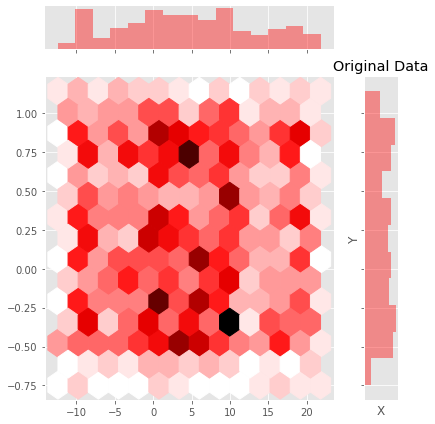

In [31]:
data_ori = transformer.sample(n_samples=1_000)

plot_2d_joint(data_ori)

#### TODO:

Figure out a good way to refit the.

**Option I**:

Reorder to space such that we have more bins

* `np.linspace(support_ext, support_ext + 1, href.shape[0])`

**Option II**:

Just have extra bins

* `np.hstack([support_ext, href, support_ext + 1])`

**Option III**:

Be smart and have some sort of distribution...


In [35]:
x_domain

array([-12.61360027,  22.03150401])

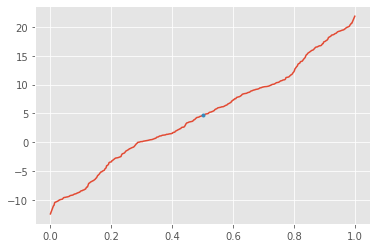

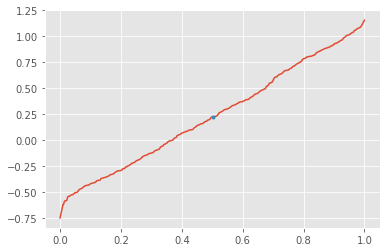

In [39]:
reference = transformer.references_[0]
quantiles = transformer.quantiles_[0]
mid_cdf_idx = int(np.ceil(len(quantiles) /2))
mid_cdf_x, mid_cdf_y = reference[mid_cdf_idx], quantiles[mid_cdf_idx]


fig = plt.figure()
plt.plot(reference, quantiles)
plt.plot(mid_cdf_x, mid_cdf_y, marker='.')
plt.show()

reference = transformer.references_[1]
quantiles = transformer.quantiles_[1]
mid_cdf_idx = int(np.ceil(len(quantiles) /2))
mid_cdf_x, mid_cdf_y = reference[mid_cdf_idx], quantiles[mid_cdf_idx]

fig = plt.figure()
plt.plot(reference, quantiles)
plt.plot(mid_cdf_x, mid_cdf_y, marker='.')
plt.show()